In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import random
from collections import Counter

In [3]:
def read_in_merged_data(path_to_data=''):
    """ Merge transcripts.csv with ted_main.csv

    # Arguments:
        path_to_data : str
            Specify the path to the `data` folder containing the data

    # Returns:
        df_merged : pd.DataFrame
            A data frame containing the merged transcripts.csv and ted_main.csv files
    """

    # Read in the data
    df_main = pd.read_csv('data/ted_main.csv')
    df_transcripts = pd.read_csv('data/transcripts.csv')

    # Merge data frames on `url`, since some ted talks in `ted_main.csv` do not have transcripts in `transcripts.csv`
    df_merged = df_main.merge(df_transcripts, how="inner", on="url")

    return df_merged

df_merged = read_in_merged_data('../data/')

In [28]:
def extract_label(tags):
    """Returns the T/E/D label for a TED talk based on its keyword tags,
       where T = Technology, E = Entertainment, D = Design.

    # Parameters:
        tags: str, containing a list of keyword tags for a TED Talk.
                Example input: "['computers', 'design', 'technology']"
    
    # Returns:
        label: str, T/E/D label
                Options: "Other", "T", "E", "D", "TE", "TD", "ED" and "TED"
    """
    
    # Cast tags from string to a list e.g. "['technology', 'design']" to ['technology', 'design']
    tags = eval(tags) 
    

    # Cast all tags to lower case 
    tags = [tag.lower() for tag in tags] 

    # Extract which T/E/D categories are contained in the keyword tags
    label_categories = ['technology', 'entertainment', 'design','science','children'] 
    ted_category = set(label_categories).intersection(tags)  

    # Sort the extracted T/E/D categories in T-E-D order i.e. descending order
    ted_category = sorted(list(ted_category),key=lambda item: item[1], reverse = True) 

    # Extract and capitalize the first letter of each T/E/D component
    ted_category = [c[0].upper() for c in ted_category] 

     # Cast the list to a string e.g. ["T", "D"] to "TD"
    ted_category = "".join(ted_category)

    # If no T/E/D category, label the talk as "other"
    label = "Other" if ted_category == "" else ted_category

    return label

df_merged["label"] = df_merged["tags"].apply(extract_label)

In [29]:
print(f"Number of samples: {len(df_merged)}")
print(f"Number of classes: {df_merged['label'].nunique()}")
print(f"Median number of words per sample: {round(np.median([len(transcript.split()) for transcript in list(df_merged['transcript'])]))}")
print(f"Min number of words per sample: {np.min([len(transcript.split()) for transcript in list(df_merged['transcript'])])}")
print(f"Max number of words per sample: {np.max([len(transcript.split()) for transcript in list(df_merged['transcript'])])}")

Number of samples: 2467
Number of classes: 27
Median number of words per sample: 2028
Min number of words per sample: 1
Max number of words per sample: 9044


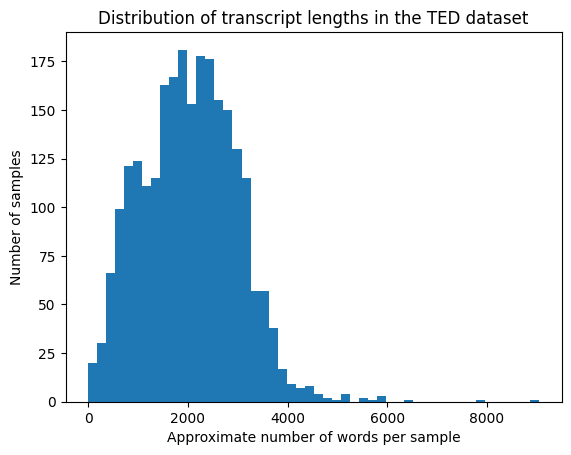

In [30]:
def plot_sample_length_distribution(df):
    """Plots a histogram with the distribution of the transcript lengths stored in a data frame.
    
    # Parameters:
        df: pd.DataFrame, a data frame containing a "transcript" column

    # Raises:
        AssertionError : if "transcript" is not a column in `df` 
    """
    assert "transcript" in df.columns

    plt.hist([len(transcript.split()) for transcript in list(df['transcript'])], 50)
    plt.ylabel("Number of samples")
    plt.xlabel("Approximate number of words per sample")
    plt.title("Distribution of transcript lengths in the TED dataset")

plot_sample_length_distribution(df_merged)

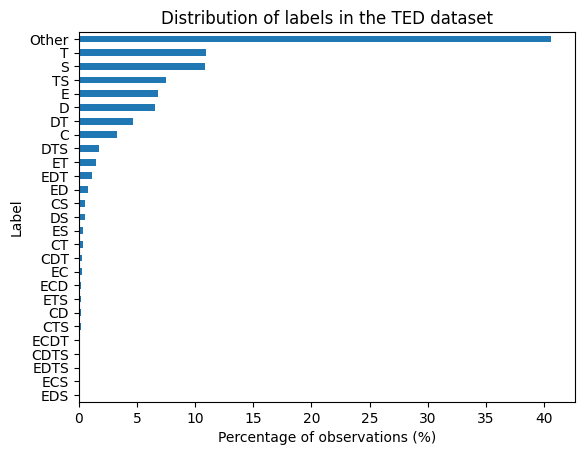

In [31]:
def plot_y_distribution(df, percentages=False):
    """Plots a horizontal bar graph with the distribution of the labels in a data frame.
    
    # Parameters:
        df: pd.DataFrame, a data frame containing a "label" column
        percentages: bool, whether to plot the proprtion of observations a given label
                            corresponds to, or just the raw counts

    # Raises:
        AssertionError : if "label" is not a column in `df` 
    """
    assert "label" in df.columns

    if percentages:
        (df["label"].value_counts()/len(df)*100.0).sort_values().plot.barh()
        plt.xlabel("Percentage of observations (%)")
    else:
        df["label"].value_counts().sort_values().plot.barh()
        plt.xlabel("Number of observations")

    plt.ylabel("Label")
    plt.title("Distribution of labels in the TED dataset")

#     plt.savefig(f"DistributionOfLabels.png", dpi=300)
    
plot_y_distribution(df_merged, True)